The extracted number is: 190.0


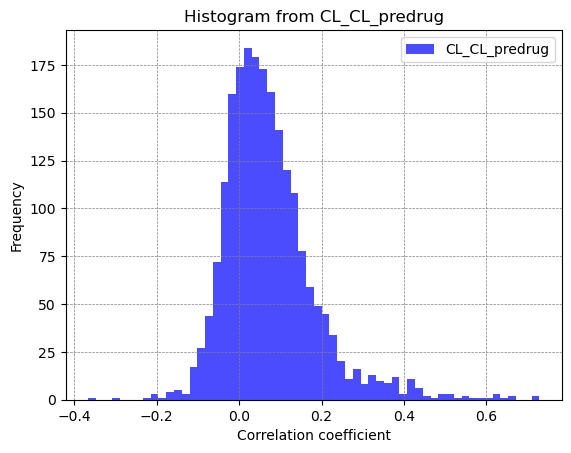

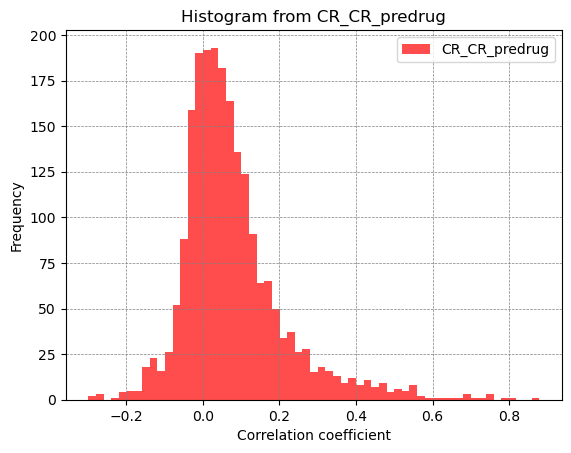

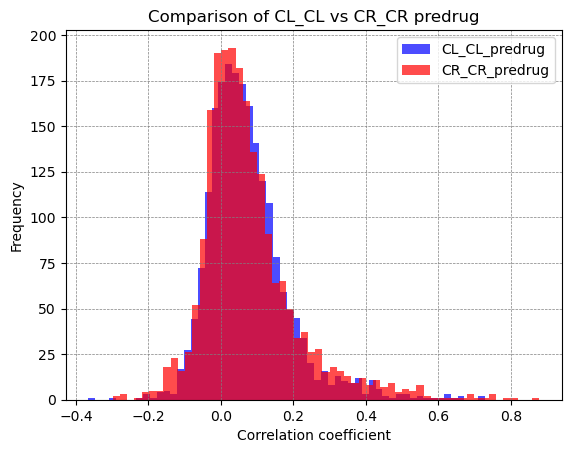

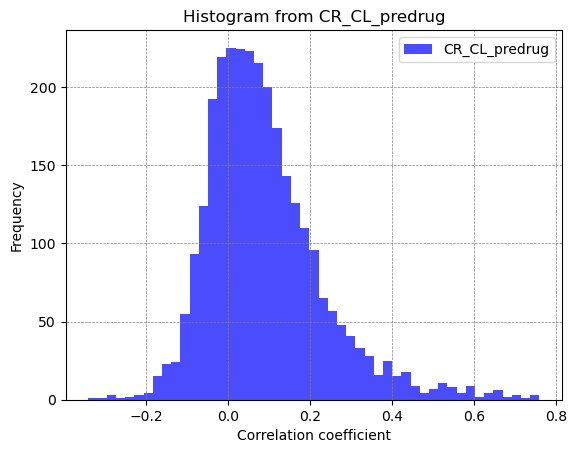

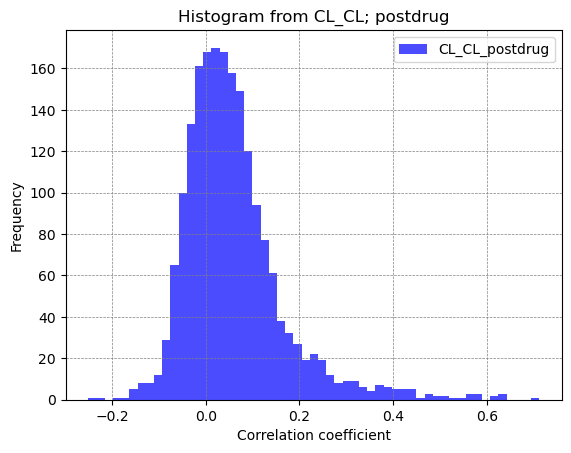

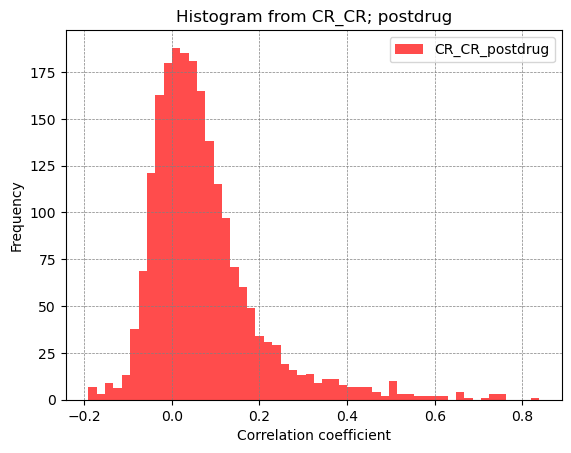

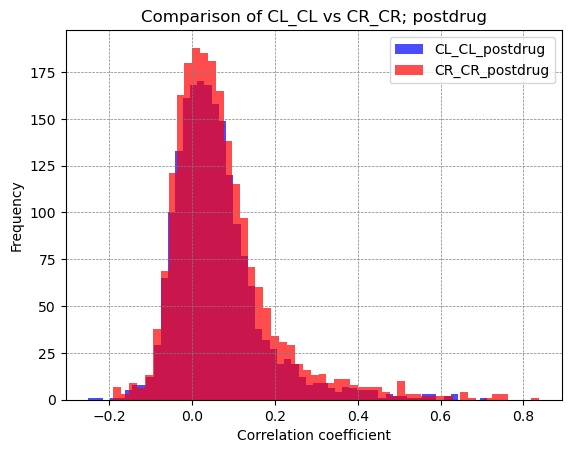

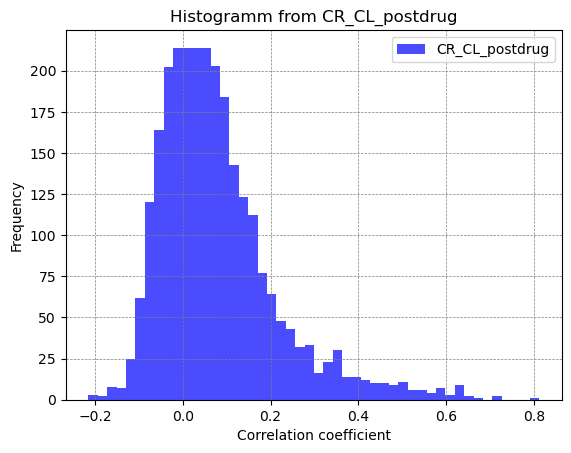

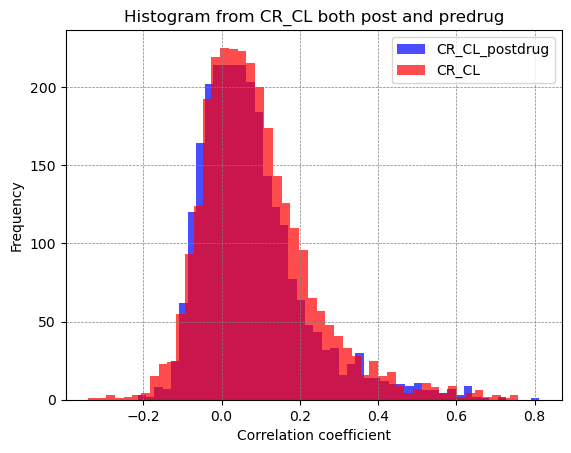

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Setting general variables
#please insert here your file names
file_predrug = "predrug_TB_sub-Linus_epi_D99_atlas_in_NMT_v2.1_sym_05mm_000.txt"
file_postdrug = "postdrug_TB_sub-Linus_epi_D99_atlas_in_NMT_v2.1_sym_05mm_000.txt"

# extrate number of ROIs which is in line one in every netcc (here txt) file
def extract_number_from_first_line(file_predrug):  # predrug because number should be the same in both files
    with open(file_predrug, 'r') as file: 
        # just read the first line
        first_line = file.readline()
        
        match = re.search(r'\d+', first_line)  
        
        if match:
            return float(match.group())  # extrate number and give it back as float
        else:
            raise ValueError("No number was found in this line")

try:
    number = extract_number_from_first_line(file_predrug)
    print(f"The extracted number is: {number}")
    
    # declare variables 
    matrix_half = (number / 2) + 6   # half lines of CC
    matrix_max = number + 6          # max. lines of CC
    number_half = (number / 2)       # half columns of CC
    number_max = number - 1          # max. columns of CC
    number_begin = 6                 # begin of lines

    # CL-CL; predrug
    CL_CL = []
    with open(file_predrug, 'rt') as myfile:  
        for i, line in enumerate(myfile, start=1):
            if i <= number_begin:
                continue
            if i > matrix_half:
                break
            line = line.strip()
            if not line:
                continue
            parts = line.split()
            # generate dynamical columns
            tuple_values = [float(parts[int(i)]) for i in np.arange(0, number_half)]

          #  add tuple to CL_CL
            if len(tuple_values) == number_half:
               CL_CL.append(tuple(tuple_values))       

    # Extract all values from the tuples into flat lists
    CL_CL_values = [value for tup in CL_CL for value in tup]

    #CR-CR; predrug
    CR_CR = []
    with open (file_predrug, 'rt') as myfile:  
        for i, line in enumerate(myfile, start=1):  
            if i <= matrix_half:  
               continue
            if i > matrix_max:  
               break
            line = line.strip()               
            if not line:
               continue
            parts = line.split()
            tuple_values = [float(parts[int(i)]) for i in np.arange(number_half, number_max)]

          # add tuple to CR_CR
            if len(tuple_values) == (number_max - number_half):
               CR_CR.append(tuple(tuple_values))   
                
    # Extract all values from the tuples into flat lists
    CR_CR_values = [value for tup in CR_CR for value in tup]
    
    #CR-CL; predrug
    CR_CL = []
    with open (file_predrug, 'rt') as myfile:  
        for i, line in enumerate(myfile, start=1):  
            if i <= matrix_half:  
               continue
            if i > matrix_max:  
               break
            line = line.strip()               
            if not line:
               continue
            parts = line.split()
            tuple_values = [float(parts[int(i)]) for i in np.arange(0, number_half)]

          # add tuple to CR_CL
            if len(tuple_values) == number_half:
               CR_CL.append(tuple(tuple_values))   
                
    # Extract all values from the tuples into flat lists
    CR_CL_values = [value for tup in CR_CL for value in tup]

    # Removing duplicates
    unique_values_CL = np.unique(CL_CL_values)
    unique_values_CR = np.unique(CR_CR_values)
    unique_values_CRCL = np.unique(CR_CL_values)

    # Excluding values == 1
    filtered_values_CL = unique_values_CL[unique_values_CL != 1.0]
    filtered_values_CR = unique_values_CR[unique_values_CR != 1.0]
    filtered_values_CRCL = unique_values_CRCL[unique_values_CRCL != 1.0]

    # Create histogram for CL_CL
    plt.figure()
    plt.hist(filtered_values_CL, bins='auto', alpha=0.7, label='CL_CL_predrug', color='blue')
    plt.title('Histogram from CL_CL_predrug')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.show()

    # create diagram for CR_CR
    plt.figure()
    plt.hist(filtered_values_CR, bins='auto', alpha=0.7, label='CR_CR_predrug', color='red')
    plt.title('Histogram from CR_CR_predrug')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.show()

    # create histogram for both data
    plt.hist(filtered_values_CL, bins='auto', alpha=0.7, label='CL_CL_predrug', color='blue')
    plt.hist(filtered_values_CR, bins='auto', alpha=0.7, label='CR_CR_predrug', color='red')

    plt.title('Comparison of CL_CL vs CR_CR predrug')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.show()      

    # create diagramm for CR_CL
    plt.figure()
    plt.hist(filtered_values_CRCL, bins='auto', alpha=0.7, label='CR_CL_predrug', color='blue')
    plt.title('Histogram from CR_CL_predrug')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    #plt.grid(True)
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.show()

#postdrug
    # CL-CL; predrug
    CL_CL_postdrug = []
    with open(file_postdrug, 'rt') as myfile: 
        for i, line in enumerate(myfile, start=1):
            if i <= number_begin:
                continue
            if i > matrix_half:
                break
            line = line.strip()
            if not line:
                continue
            parts = line.split()
            tuple_values = [float(parts[int(i)]) for i in np.arange(0, number_half)]
            if len(tuple_values) == number_half:
               CL_CL_postdrug.append(tuple(tuple_values))       

    # Extract all values from the tuples into flat lists
    CL_CL_values_postdrug = [value for tup in CL_CL_postdrug for value in tup]

    #CR-CR; predrug
    CR_CR_postdrug = []
    with open (file_postdrug, 'rt') as myfile:  
        for i, line in enumerate(myfile, start=1):  
            if i <= matrix_half:  
               continue
            if i > matrix_max:  
               break
            line = line.strip()               
            if not line:
               continue
            parts = line.split()
            tuple_values = [float(parts[int(i)]) for i in np.arange(number_half, number_max)]

            if len(tuple_values) == (number_max - number_half):
               CR_CR_postdrug.append(tuple(tuple_values)) 
                
    # Extract all values from the tuples into flat lists
    CR_CR_values_postdrug = [value for tup in CR_CR_postdrug for value in tup]
    
    #CR-CL; predrug
    CR_CL_postdrug = []
    with open (file_postdrug, 'rt') as myfile:  
        for i, line in enumerate(myfile, start=1):  
            if i <= matrix_half:  
               continue
            if i > matrix_max:  
               break
            line = line.strip()               
            if not line:
               continue
            parts = line.split()
            tuple_values = [float(parts[int(i)]) for i in np.arange(0, number_half)]

            if len(tuple_values) == number_half:
               CR_CL_postdrug.append(tuple(tuple_values)) 
                
    # Extract all values from the tuples into flat lists
    CR_CL_values_postdrug = [value for tup in CR_CL_postdrug for value in tup]

    # removing of duplicates
    unique_values_CL_postdrug = np.unique(CL_CL_values_postdrug)
    unique_values_CR_postdrug = np.unique(CR_CR_values_postdrug)
    unique_values_CRCL_postdrug = np.unique(CR_CL_values_postdrug)

    # exclude values == 1
    filtered_values_CL_postdrug = unique_values_CL_postdrug[unique_values_CL_postdrug != 1.0]
    filtered_values_CR_postdrug = unique_values_CR_postdrug[unique_values_CR_postdrug != 1.0]
    filtered_values_CRCL_postdrug = unique_values_CRCL_postdrug[unique_values_CRCL_postdrug != 1.0]

    # create diagramm for CL_CL
    plt.figure()
    plt.hist(filtered_values_CL_postdrug, bins='auto', alpha=0.7, label='CL_CL_postdrug', color='blue')
    plt.title('Histogram from CL_CL; postdrug')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.show()

    # create diagramm for CR_CR
    plt.figure()
    plt.hist(filtered_values_CR_postdrug, bins='auto', alpha=0.7, label='CR_CR_postdrug', color='red')
    plt.title('Histogram from CR_CR; postdrug')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.show()

    # create diagramm for both data
    plt.hist(filtered_values_CL_postdrug, bins='auto', alpha=0.7, label='CL_CL_postdrug', color='blue')
    plt.hist(filtered_values_CR_postdrug, bins='auto', alpha=0.7, label='CR_CR_postdrug', color='red')

    plt.title('Comparison of CL_CL vs CR_CR; postdrug')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.show()      

    # create diagramm for CR_CL
    plt.figure()
    plt.hist(filtered_values_CRCL_postdrug, bins='auto', alpha=0.7, label='CR_CL_postdrug', color='blue')
    plt.title('Histogramm from CR_CL_postdrug')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.show()


    #post and presdrug
    # create diagramm for CR_CL
    plt.figure()
    plt.hist(filtered_values_CRCL_postdrug, bins='auto', alpha=0.7, label='CR_CL_postdrug', color='blue')
    plt.hist(filtered_values_CRCL, bins='auto', alpha=0.7, label='CR_CL', color='red')
    plt.title('Histogram from CR_CL both post and predrug')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.show()

    # create diagramm for CL-CL
    plt.figure()
    plt.hist(filtered_values_CL_postdrug, bins='auto', alpha=0.7, label='CL_postdrug', color='blue')
    plt.hist(filtered_values_CL, bins='auto', alpha=0.7, label='CL_predrug', color='red')
    plt.title('Histogram from CL_CL both post and predrug')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.show()

    # create diagramm for CR_CL
    plt.figure()
    plt.hist(filtered_values_CR_postdrug, bins='auto', alpha=0.7, label='CR_postdrug', color='blue')
    plt.hist(filtered_values_CR, bins='auto', alpha=0.7, label='CR_predrug', color='red')
    plt.title('Histogram from CR_CR both post and predrug')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.show()

except FileNotFoundError:
    print("File was not found.")
except ValueError as e:
    print(e)
except Exception as e:
    print(f"An unexpected error has occurred: {e}")
